In [1]:
pip install nltk

In [2]:
#Ejemplo básico de clasificador de textos utilizando el clasificador
#Naive Bayes de NLTK

# 1. Importación de bibliotecas

import nltk
import random
from nltk.corpus import movie_reviews
# Descargar el recurso 'punkt'
nltk.download('punkt')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
# 2. Definición del cojunto de datos etiquetados

import csv

# Ruta a tu archivo de etiquetas
Train_sentiment = 'Train_Sentiment.csv'

# Leer el archivo CSV y convertirlo en una lista de tuplas
data = []
try:
    with open(Train_sentiment, newline='', encoding='utf-8') as csvfile:
        # Usa DictReader con el delimitador correcto
        reader = csv.DictReader(csvfile, delimiter=';')
        for line_num, row in enumerate(reader, start=1):
            phrase = row.get('Phrase')
            sentiment = row.get('Sentiment')
            if phrase and sentiment:
                data.append((phrase, sentiment))
            else:
                print(f"Advertencia: Línea incorrecta en {line_num}: {row}")
except FileNotFoundError as e:
    print("Error: El archivo no fue encontrado.", e)
except csv.Error as e:
    print("Error al leer el archivo CSV:", e)

# Mostrar las primeras filas de la lista de tuplas para verificar que se ha leído correctamente
for i in range(min(5, len(data))):
    print(data[i])

# Mostrar la cantidad total de datos leídos
print()
print(f"Cantidad total de datos leídos: {len(data)}")

('This quiet , introspective and entertaining independent is worth seeking .', 'positive')
('quiet , introspective and entertaining independent', 'positive')
('entertaining', 'positive')
('is worth seeking', 'positive')
('would have a hard time sitting through this one', 'negative')

Cantidad total de datos leídos: 16278


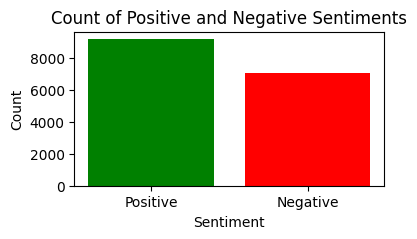

Positive count: 9206
Negative count: 7072


In [19]:
# Contar la cantidad de comentarios positivos y negativos

positive_count = sum(1 for _, label in data if label == "positive")
negative_count = sum(1 for _, label in data if label == "negative")

# Crear la gráfica
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

plt.figure(figsize=(4, 2))  # Ancho 6 pulgadas, Alto 4 pulgadas
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Positive and Negative Sentiments')
plt.show()
print("Positive count:",positive_count)
print("Negative count:",negative_count)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


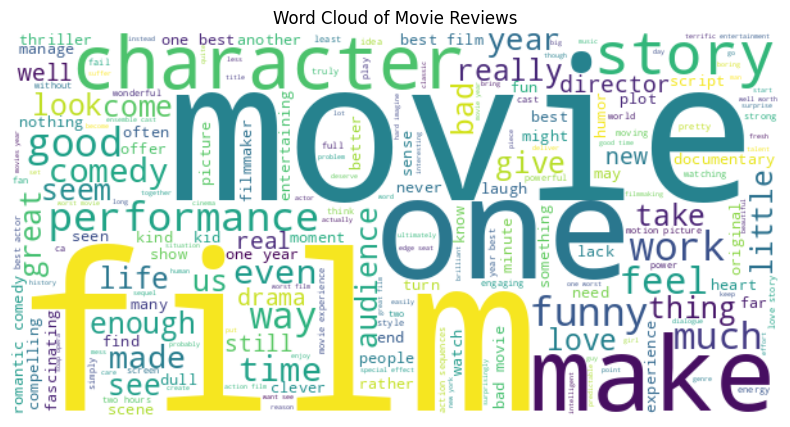

In [20]:
# Muertra la nube de palabras

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Preprocesar los textos
all_words = []
stop_words = set(stopwords.words('english'))

for text, label in data:
    words = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Eliminar puntuación y stopwords
    all_words.extend(words)

# Crear la nube de palabras
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(' '.join(all_words))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


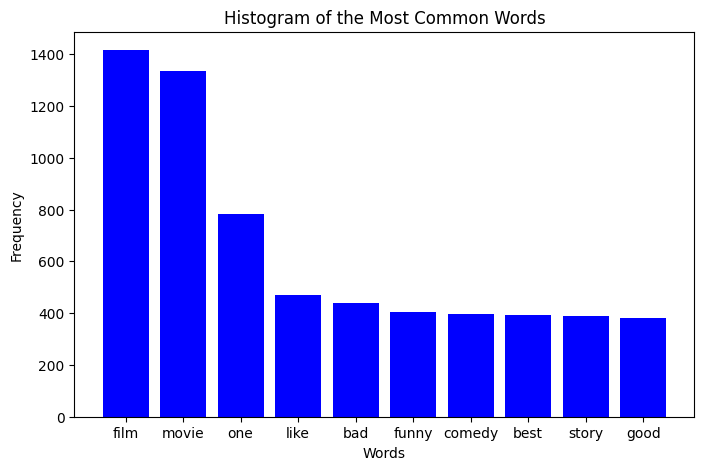

In [21]:
# Muestra el histograma de las palabras

import matplotlib.pyplot as plt
from collections import Counter

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Preprocesar los textos
all_words = []
stop_words = set(stopwords.words('english'))

for text, label in data:
    words = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Eliminar puntuación y stopwords
    all_words.extend(words)

# Contar la frecuencia de las palabras
word_freq = Counter(all_words)

# Seleccionar las palabras más comunes
common_words = word_freq.most_common(10)

# Crear listas de palabras y sus frecuencias
words = [word for word, freq in common_words]
frequencies = [freq for word, freq in common_words]

# Generar el histograma
plt.figure(figsize=(8, 5))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram of the Most Common Words')
plt.show()

In [51]:
# 3. Preprocesamiento de datos

#Preprocesamiento de datos: tokenización y extracción de características
def preprocess_data(text):
    preprocessed_data = []
    tokens = nltk.word_tokenize(text)
    return {word: True for word in tokens}



In [52]:
# 4. Aplicación de preprocesamiento a los datos

# Aplicamos el preprocesamiento a los datos
featuresets = [(preprocess_data(text), label) for (text, label) in data]

In [53]:
# 5. División de datos
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_set, test_set = train_test_split(featuresets, test_size=0.2, random_state=42)

# Mostrar la cantidad de datos en cada conjunto
print(f"Cantidad de datos de entrenamiento: {len(train_set)}")
print(f"Cantidad de datos de prueba: {len(test_set)}")

Cantidad de datos de entrenamiento: 13022
Cantidad de datos de prueba: 3256


In [54]:
# 6. Entrenamiento del clasificador

#Entrenamos un clasificador utilizando Naive Bayes
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [55]:
# 7. Evaluación del clasificador

#Evaluamos el clasificador en el conjunto de prueba
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

Accuracy: 0.9186117936117936


Puntaje F1: 0.92


<Figure size 400x200 with 0 Axes>

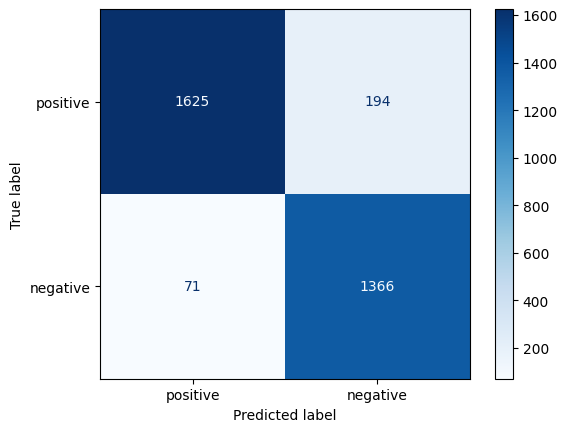

In [56]:
# Matriz de confusión

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Obtener etiquetas verdaderas y predichas para la matriz de confusión
true_labels = [label for (features, label) in test_set]
predicted_labels = [classifier.classify(features) for (features, label) in test_set]

# Generar la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels, labels=["positive", "negative"])

# Calcular el puntaje F1
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Mostrar el puntaje F1
print(f"Puntaje F1: {f1:.2f}")

# Dibujar la matriz de confusión
plt.figure(figsize=(4, 2))  # Ajusta el tamaño del gráfico aquí
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [57]:
# 8. Clasificación de un nuevo texto
#Clasificamos un nuevo texto
new_text = "This movie is amazing"
new_text_features = preprocess_data(new_text)
predicted_label = classifier.classify(new_text_features)
print("Predicted_label:", predicted_label)

Predicted_label: positive
